In [ ]:
from MetaTrader5 import *
from datetime import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn; seaborn.set()
# Initializing MT5 connection 
MT5Initialize("C:\\Program Files\\MetaTrader 5\\terminal64.exe")
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'Alpari-MT5-Demo', '50480221']
[500, 2209, '13 Nov 2019']


Названия то статььей на первый взгляд не очень совпадают, поэтому [ссылка на статью на mql5](https://www.mql5.com/ru/articles/7038)

## Monthly boxplot

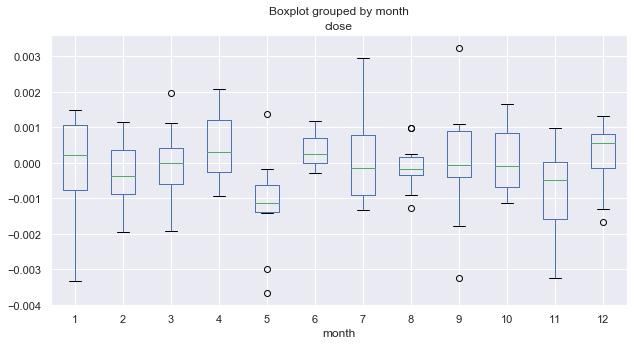

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2010, 1, 1), datetime(2020, 1, 1)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)

# get percent change (price returns)
returns = pd.DataFrame(np.log(1 + rates['close'].pct_change(1)))

returns = returns.set_index(rates['time'])
returns = returns[1:]
returns.head(5)

Monthly_Returns = returns.groupby([returns.index.year.rename('year'), returns.index.month.rename('month')]).mean()
Monthly_Returns.boxplot(column='close', by='month', figsize=(10, 5))

## Daily boxplot for all months

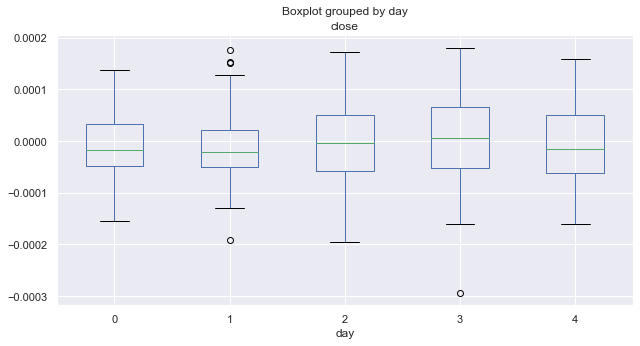

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_H1, datetime(2010, 1, 1), datetime(2020, 1, 1)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)

# get percent change (price returns)
returns = pd.DataFrame(np.log(1 + rates['close'].pct_change(1)))

returns = returns.set_index(rates['time'])
returns = returns[1:]
returns.head(5)

Daily_Returns = returns.groupby([returns.index.week.rename('week'), returns.index.dayofweek.rename('day')]).mean()
Daily_Returns.boxplot(column='close', by='day', figsize=(10, 5))

### Daily boxplot for the selected month

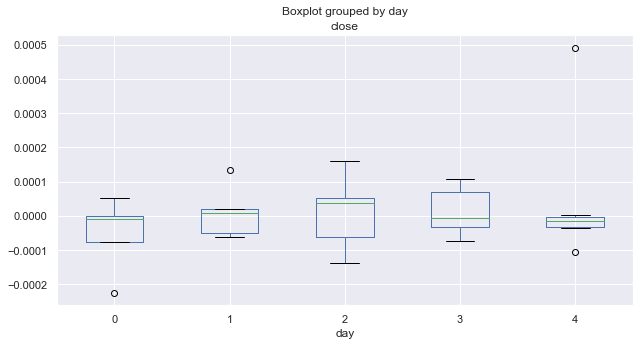

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_H1, datetime(2010, 1, 1), datetime(2020, 1, 1)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)

# get percent change (price returns)
returns = pd.DataFrame(np.log(1 + rates['close'].pct_change(1)))
returns = returns.set_index(rates['time'])
returns = returns[1:]

# leave only one month "returns.index[~returns.index.month.isin([1])"
returns = returns.drop(returns.index[~returns.index.month.isin([10])])
Daily_Returns = returns.groupby([returns.index.week.rename('week'), returns.index.dayofweek.rename('day')]).mean()
Daily_Returns.boxplot(column='close', by='day', figsize=(10, 5))

## Hourly boxplot for price returns with 1 lag

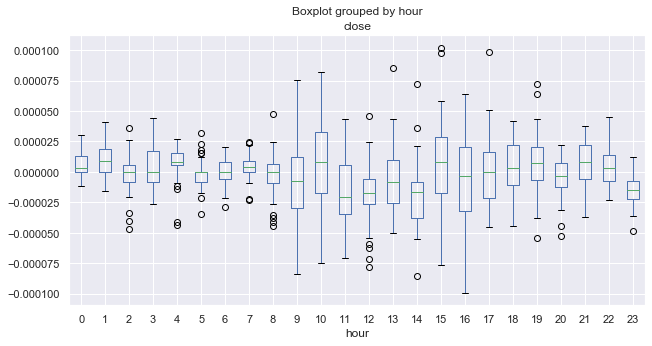

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_M15, datetime(2010, 1, 1), datetime(2019, 11, 25)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)

# get percent change (price returns)
returns = pd.DataFrame(rates['close'].pct_change(1))
returns = returns.set_index(rates['time'])
returns = returns[1:]


Hourly_Returns = returns.groupby([returns.index.day.rename('day'), returns.index.hour.rename('hour')]).median()
Hourly_Returns.boxplot(column='close', by='hour', figsize=(10, 5))

## Hourly boxplot for detrended price by moving average

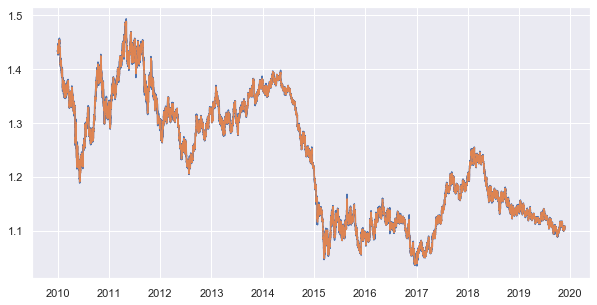

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_M15, datetime(2010, 1, 1), datetime(2019, 11, 25)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates = rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)
rates = rates.set_index('time')
# set the moving average period
window = 25
# detrend tome series by MA
ratesM = rates.rolling(window).mean()
ratesD = rates[window:] - ratesM[window:]

plt.figure(figsize=(10, 5))
plt.plot(rates)
plt.plot(ratesM)

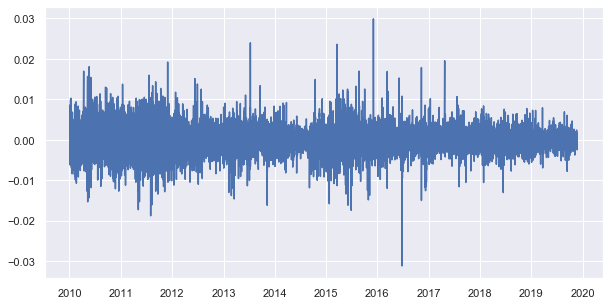

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ratesD)

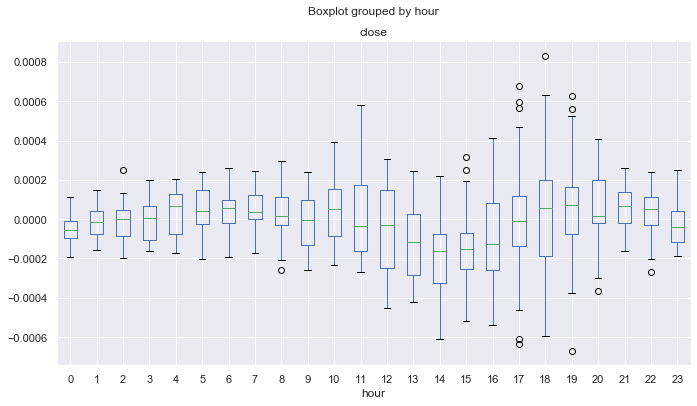

In [ ]:
Hourly_Returns = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).median()
Hourly_Returns.boxplot(column='close', by='hour', figsize=(11, 6))

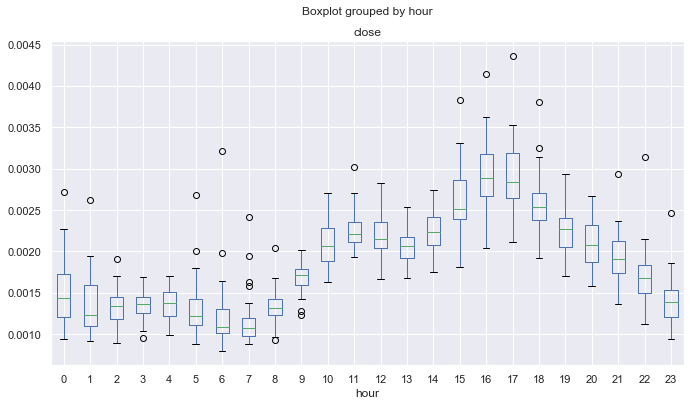

In [ ]:
# standard deviation
Hourly_std = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).std()
Hourly_std.boxplot(column='close', by='hour', figsize=(11, 6))

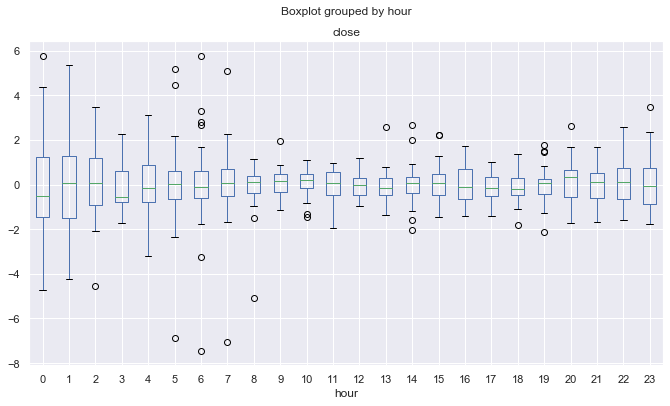

In [ ]:
# skewness
Hourly_skew = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).skew()
Hourly_skew.boxplot(column='close', by='hour', figsize=(11, 6))

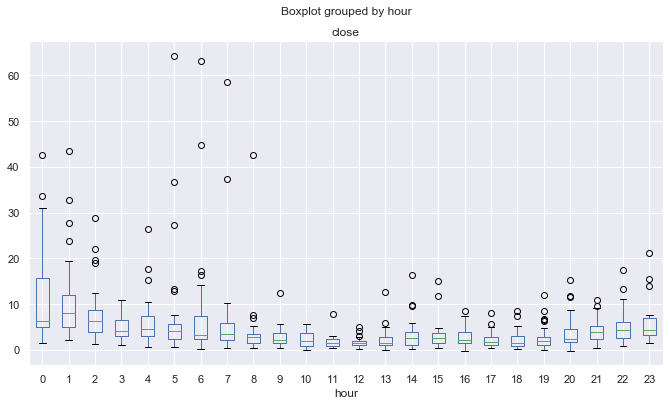

In [ ]:
# kurtosis
Hourly_std = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).apply(pd.DataFrame.kurt)
Hourly_std.boxplot(column='close', by='hour', figsize=(11, 6))

### Hourly boxplot for detrended price by moving average for the selected month

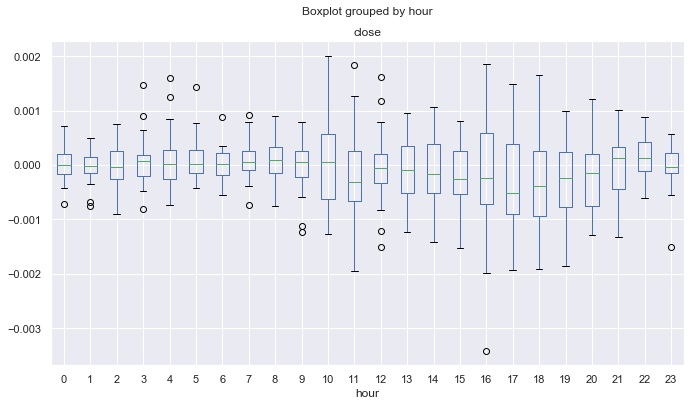

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_M15, datetime(2010, 1, 1), datetime(2019, 11, 25)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' иcolumns
rates = rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)
rates = rates.set_index('time')
# set the moving average period
window = 25
# detrend tome series by MA
ratesM = rates.rolling(window).mean()
ratesD = rates[window:] - ratesM[window:]

# leave only one month "ratesD.index[~ratesD.index.month.isin([1])"
ratesD = ratesD.drop(ratesD.index[~ratesD.index.month.isin([11])])

Hourly_Returns = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).median()
Hourly_Returns.boxplot(column='close', by='hour', figsize=(11, 6))

### Hourly boxplot for detrended price by moving average for the selected month and day

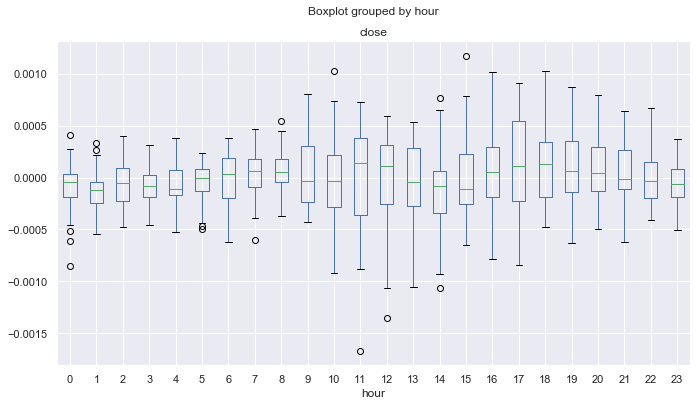

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_M15, datetime(2010, 1, 1), datetime(2019, 11, 25)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' иcolumns
rates = rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)
rates = rates.set_index('time')
# set the moving average period
window = 25
# detrend tome series by MA
ratesM = rates.rolling(window).mean()
ratesD = rates[window:] - ratesM[window:]

# leave only one month "ratesD.index[~ratesD.index.month.isin([1])" or "ratesD.index[~ratesD.index.dayofweek.isin([1])"
ratesD = ratesD.drop(ratesD.index[~ratesD.index.dayofweek.isin([0])])

Hourly_Returns = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).median()
Hourly_Returns.boxplot(column='close', by='hour', figsize=(11, 6))

## Hourly boxplot for detrended price by moving average 2017-2019

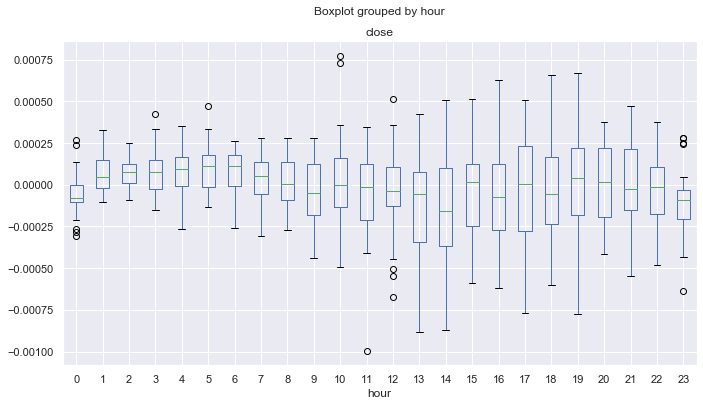

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_M15, datetime(2017, 1, 1), datetime(2019, 11, 25)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates = rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)
rates = rates.set_index('time')
# set the moving average period
window = 25
# detrend tome series by MA
ratesM = rates.rolling(window).mean()
ratesD = rates[window:] - ratesM[window:]

Hourly_Returns = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).median()
Hourly_Returns.boxplot(column='close', by='hour', figsize=(11, 6))

## Hourly boxplot for detrended price by moving average 2015-2017


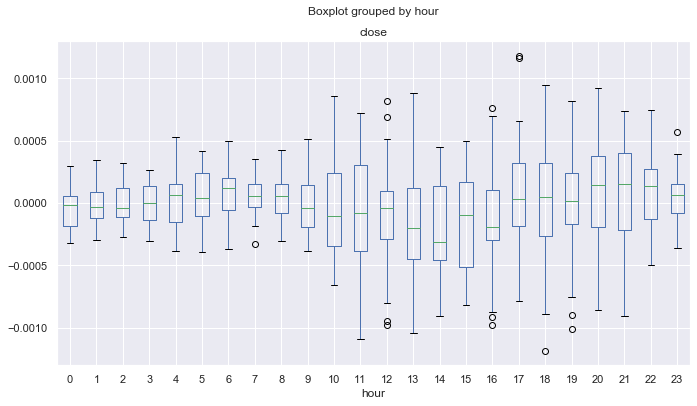

In [ ]:
rates = pd.DataFrame(MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_M15, datetime(2015, 1, 1), datetime(2017, 11, 25)), 
                     columns=['time', 'open', 'low', 'high', 'close', 'tick_volume', 'spread', 'real_volume'])
# leave only 'time' and 'close' columns
rates = rates.drop(['open', 'low', 'high', 'tick_volume', 'spread', 'real_volume'], axis=1)
rates = rates.set_index('time')
# set the moving average period
window = 25
# detrend tome series by MA
ratesM = rates.rolling(window).mean()
ratesD = rates[window:] - ratesM[window:]

Hourly_Returns = ratesD.groupby([ratesD.index.day.rename('day'), ratesD.index.hour.rename('hour')]).median()
Hourly_Returns.boxplot(column='close', by='hour', figsize=(11, 6))